# 서울특별시 공공자전거 이용정보 데이터 분석
*사용 데이터 : 서울특별시 공공자전거 이용정보(월별)
*데이터 측정 기간 : 2024년 7월 ~ 12월  


# 1. 데이터 불러오기

In [35]:
import pandas as pd

data = pd.read_csv("../chan/서울특별시 공공자전거 이용정보(월별)_24.7-12.csv",encoding= "CP949") # utf -8 ,CP949
# 유니코드 디코딩을 만나면 인코딩을 해준다 encoding= "CP949" or " utf-8"
data


,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,NaN,20대,67,4304.28,40.87,176252.62,1895
1,202407,102,102. 망원역 1번출구 앞,일일권,NaN,30대,64,4142.09,38.92,167774.15,1498
2,202407,102,102. 망원역 1번출구 앞,일일권,NaN,40대,2,265.91,2.11,9098.64,64
3,202407,102,102. 망원역 1번출구 앞,일일권,NaN,50대,6,648.52,5.11,22048.26,149
4,202407,102,102. 망원역 1번출구 앞,일일권,NaN,60대,1,35.37,0.31,1333.18,6
...,...,...,...,...,...,...,...,...,...,...,...
619659,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,40대,55,2964.38,23.14,99803.49,1050
619660,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,50대,10,327.38,2.57,11073.52,183
619661,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,60대,1,14.37,0.13,558.26,3
619662,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,~10대,7,249.95,2.35,10151.09,80


In [36]:
data.shape #데이터의 숫자를 알 수 있음 

(619664, 11)

In [37]:
data.columns

Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)'],
      dtype='object')

# 2. 데이터 정보 확인하기 

In [38]:
data.info() #데이터 인포를 사용하는 이유 : 정보만 가지고도 몆개행의 데이터가 있는지 결측치 여부도 파악가능하다 
#d type의 object 수정 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     619664 non-null  int64  
 1   대여소번호    619664 non-null  int64  
 2   대여소명     619664 non-null  object 
 3   대여구분코드   619664 non-null  object 
 4   성별       424280 non-null  object 
 5   연령대코드    619664 non-null  object 
 6   이용건수     619664 non-null  int64  
 7   운동량      619269 non-null  float64
 8   탄소량      619269 non-null  float64
 9   이동거리(M)  619664 non-null  float64
 10  이용시간(분)  619664 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 52.0+ MB


In [39]:
data.describe()

,대여일자,대여소번호,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,619664.000000,619664.000000,619664.000000,619269.000000,619269.000000,6.196640e+05,619664.000000
mean,202409.460550,2372.396744,36.207324,2171.806347,18.868742,8.161182e+04,741.158513
std,1.679584,1606.029446,68.309988,4094.071706,34.935409,1.511538e+05,1343.878371
min,202407.000000,102.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,202408.000000,1003.000000,4.000000,221.250000,2.010000,8.705685e+03,81.000000
50%,202409.000000,2060.000000,12.000000,773.460000,6.950000,3.007392e+04,274.000000
75%,202411.000000,3816.000000,39.000000,2391.900000,21.140000,9.141029e+04,827.000000
max,202412.000000,6178.000000,2454.000000,271725.720000,2652.600000,1.154394e+07,95970.000000


In [40]:
#202407
pd.to_datetime(data["대여일자"], format="%Y%m")


0        2024-07-01
1        2024-07-01
2        2024-07-01
3        2024-07-01
4        2024-07-01
            ...    
619659   2024-12-01
619660   2024-12-01
619661   2024-12-01
619662   2024-12-01
619663   2024-12-01
Name: 대여일자, Length: 619664, dtype: datetime64[ns]

### 대여일자를 datatime으로 바꾸지 않는 이유 
int, float 타입으로 되어 있는 열은 '.describe()'라는 함수를 이용할때 통계에 이용된다. 
하지만 대여소번호와 같이 고유의 이름을 의미하는 경우에는 
통계가 필요없기 때문에 object로 형 변환을 해줄 필요가 있다. 

우리가 분석하는 이 데이터는 일자별로 계속 측정이 된 게 아니라 
월별로 집계된 데이터이기 때문에 이 데이터에서 대여일자는 카테고리라고 할 수 있다.

## 1)데이터 형 변환

In [41]:
# .astype()
new_data = data.astype({"대여일자": "object", "대여소번호": "object"})
new_data.dtypes

대여일자        object
대여소번호       object
대여소명        object
대여구분코드      object
성별          object
연령대코드       object
이용건수         int64
운동량        float64
탄소량        float64
이동거리(M)    float64
이용시간(분)      int64
dtype: object

In [42]:
new_data["성별"].unique() 

array([nan, 'F', 'M', 'm', 'f'], dtype=object)

* 성별에 결측치가 많다. -> 응답하지 않은 내용이기 때문이다 "0" 새로운 카테고리를 만들자 
* 대문자, 소문자가 섞여 있다. -> 대문자로 통일하자 

In [43]:
new_data["성별"] = data["성별"].str.upper() #대문자로 바꾸기 
new_data["성별"] = new_data["성별"].fillna("0") #결측치 채우기 
new_data["성별"].unique()

array(['0', 'F', 'M'], dtype=object)

In [44]:

new_data["연령대코드"].unique()

array(['20대', '30대', '40대', '50대', '60대', '기타', '~10대', '70대이상'],
      dtype=object)

# 2)카테고리 변수 unique 확인하기 

In [45]:
# .unique(), .nunique()
new_data.nunique()

대여일자            6
대여소번호        2785
대여소명         2785
대여구분코드          3
성별              3
연령대코드           8
이용건수         1030
운동량        308636
탄소량         19828
이동거리(M)    577940
이용시간(분)     10037
dtype: int64

# 3. 결측치 확인하기 

In [46]:
data.isnull()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
619659,False,False,False,False,False,False,False,False,False,False,False
619660,False,False,False,False,False,False,False,False,False,False,False
619661,False,False,False,False,False,False,False,False,False,False,False
619662,False,False,False,False,False,False,False,False,False,False,False


In [47]:
data.isna().sum(axis=0) # axis = 0 

대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         195384
연령대코드           0
이용건수            0
운동량           395
탄소량           395
이동거리(M)         0
이용시간(분)         0
dtype: int64

In [48]:
# 전체 데이터에 대한 결측치 확인
nan_result = data.isna().sum(axis=0)
nan_result

대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         195384
연령대코드           0
이용건수            0
운동량           395
탄소량           395
이동거리(M)         0
이용시간(분)         0
dtype: int64

In [49]:
#nan_result 에서 성별의 결측치 개수를 구하고 싶다. 
nan_result["성별"]

np.int64(195384)

In [50]:
import numpy as np 

numeric_df = data.select_dtypes(include=[np.number])
numeric_df

,대여일자,대여소번호,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,102,67,4304.28,40.87,176252.62,1895
1,202407,102,64,4142.09,38.92,167774.15,1498
2,202407,102,2,265.91,2.11,9098.64,64
3,202407,102,6,648.52,5.11,22048.26,149
4,202407,102,1,35.37,0.31,1333.18,6
...,...,...,...,...,...,...,...
619659,202412,6178,55,2964.38,23.14,99803.49,1050
619660,202412,6178,10,327.38,2.57,11073.52,183
619661,202412,6178,1,14.37,0.13,558.26,3
619662,202412,6178,7,249.95,2.35,10151.09,80


In [51]:
np.isnan(numeric_df).sum().sum()

np.int64(790)

In [52]:
nan_count = np.isnan(numeric_df).sum().sum()
print(f"숫자형에서 NaN 개수: {nan_count}")

숫자형에서 NaN 개수: 790


In [53]:
# . astype()

## 1)새로운 열 만들기 

In [54]:
#건당 이동거리(M), 건당 이용시간(분) 열을 추가 
#건당 이동거리(M) = 이동거리(M)/ 이용건수
#건당 이용시간(분) = 이용시간(분)/ 이용건수 
new_data["건당 이동거리(M)"] = new_data["이동거리(M)"] / new_data["이용건수"]
new_data["건당 이용시간(분)"] = new_data["이용시간(분)"] / new_data["이용건수"]

new_data.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,0,20대,67,4304.28,40.87,176252.62,1895,2630.636119,28.283582
1,202407,102,102. 망원역 1번출구 앞,일일권,0,30대,64,4142.09,38.92,167774.15,1498,2621.471094,23.406250
2,202407,102,102. 망원역 1번출구 앞,일일권,0,40대,2,265.91,2.11,9098.64,64,4549.320000,32.000000
3,202407,102,102. 망원역 1번출구 앞,일일권,0,50대,6,648.52,5.11,22048.26,149,3674.710000,24.833333
4,202407,102,102. 망원역 1번출구 앞,일일권,0,60대,1,35.37,0.31,1333.18,6,1333.180000,6.000000


In [55]:
import matplotlib.pyplot as plt


In [56]:
new_data["건당 이동거리(M)"]

0         2630.636119
1         2621.471094
2         4549.320000
3         3674.710000
4         1333.180000
             ...     
619659    1814.608909
619660    1107.352000
619661     558.260000
619662    1450.155714
619663     843.373333
Name: 건당 이동거리(M), Length: 619664, dtype: float64

In [57]:
new_data.tail()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
619659,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,40대,55,2964.38,23.14,99803.49,1050,1814.608909,19.090909
619660,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,50대,10,327.38,2.57,11073.52,183,1107.352000,18.300000
619661,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,60대,1,14.37,0.13,558.26,3,558.260000,3.000000
619662,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,~10대,7,249.95,2.35,10151.09,80,1450.155714,11.428571
619663,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,기타,6,135.89,1.16,5060.24,53,843.373333,8.833333


In [58]:
new_data.describe()

,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
count,619664.000000,619269.000000,619269.000000,6.196640e+05,619664.000000,619664.000000,619664.000000
mean,36.207324,2171.806347,18.868742,8.161182e+04,741.158513,2701.308303,24.522191
std,68.309988,4094.071706,34.935409,1.511538e+05,1343.878371,2035.965154,17.922810
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4.000000,221.250000,2.010000,8.705685e+03,81.000000,1504.471840,13.866667
50%,12.000000,773.460000,6.950000,3.007392e+04,274.000000,2138.456549,20.300000
75%,39.000000,2391.900000,21.140000,9.141029e+04,827.000000,3235.145285,30.000000
max,2454.000000,271725.720000,2652.600000,1.154394e+07,95970.000000,74198.100000,863.000000


In [59]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   대여일자        619664 non-null  object 
 1   대여소번호       619664 non-null  object 
 2   대여소명        619664 non-null  object 
 3   대여구분코드      619664 non-null  object 
 4   성별          619664 non-null  object 
 5   연령대코드       619664 non-null  object 
 6   이용건수        619664 non-null  int64  
 7   운동량         619269 non-null  float64
 8   탄소량         619269 non-null  float64
 9   이동거리(M)     619664 non-null  float64
 10  이용시간(분)     619664 non-null  int64  
 11  건당 이동거리(M)  619664 non-null  float64
 12  건당 이용시간(분)  619664 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 61.5+ MB


In [60]:
# .astype()
new_data = data.astype({"대여일자": "object", "대여소번호": "object"})
new_data.dtypes

대여일자        object
대여소번호       object
대여소명        object
대여구분코드      object
성별          object
연령대코드       object
이용건수         int64
운동량        float64
탄소량        float64
이동거리(M)    float64
이용시간(분)      int64
dtype: object

# 대여가 가장 많았던 월자


In [61]:
temp_data =new_data["대여일자"].value_counts().sort_index()
temp_data

대여일자
202407    103502
202408    103316
202409    107191
202410    108791
202411    103677
202412     93187
Name: count, dtype: int64

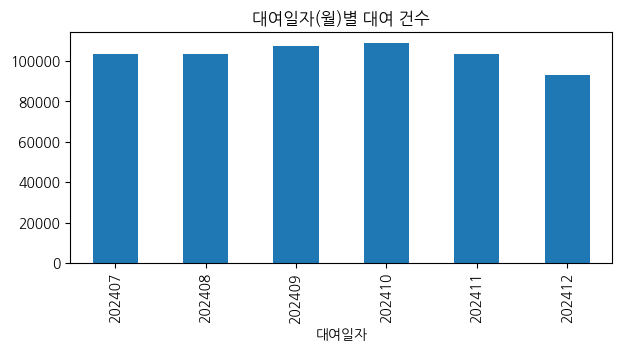

In [62]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import koreanize_matplotlib

plt.figure(figsize=(7,3))
temp_data.plot(kind="bar")
plt.title("대여일자(월)별 대여 건수")
plt.show()

*이 행은 대여소코드, 대여구분코드, 성별, 연령대 코드별로 이용건수가 집계된 행이기때문에 위의 시각화로는 의미를 도출할 수 없다 

# 성별이 남자인 사람의 평균 이동거리, 평균 이용시간 

In [63]:
data_m = new_data[new_data["성별"]=="M"]
data_m[["이동거리(M)", "이용시간(분)"]].mean()

이동거리(M)    105166.524115
이용시간(분)       929.851103
dtype: float64

In [64]:
new_data.groupby("성별")["이동거리(M)"].sum()

성별
F    1.334362e+10
M    2.358496e+10
f    3.039580e+06
m    4.730860e+06
Name: 이동거리(M), dtype: float64

In [138]:
new_data.groupby("성별")["건당 이동거리(M)"].sum()

KeyError: 'Column not found: 건당 이동거리(M)'

In [ ]:
new_data.groupby("성별")["건당 이동거리(M)"].mean()

성별
F    2684.962313
M    2668.276639
f    1814.807422
m    2040.825316
Name: 건당 이동거리(M), dtype: float64

In [ ]:
new_data.groupby("성별")[["이동거리(M)", "이용시간(분)"]].mean()

,이동거리(M),이용시간(분)
성별,,
F,66743.120151,632.958004
M,105166.524115,929.851103
f,92108.497576,927.969697
m,80184.060339,667.084746


In [ ]:
new_data.groupby("연령대코드")[["이동거리(M)", "이용시간(분)"]].agg(func=["min", "mean", "max"])

이동거리(M)                             이용시간(분)                    
          min           mean          max     min         mean    max
연령대코드                                                                
20대       0.0  142499.011865  11543940.94       0  1251.660678  95970
30대       0.0  130952.576390   4330526.00       0  1187.715240  35049
40대       0.0   94694.477750   4024667.61       0   870.983396  33037
50대       0.0   76180.055360   3922536.30       0   693.547910  23775
60대       0.0   36507.096717   2033963.12       0   366.507778  30163
70대이상     0.0   13337.460096   1096944.89       0   146.494928  16675
~10대      0.0   43806.666793   2812678.14       0   390.222317  21003
기타        0.0   37989.803873   4048404.25       0   353.929741  41665

In [ ]:
new_data.groupby("연령대코드")[["이동거리(M)", "이용시간(분)","이용건수"]].mean()

,이동거리(M),이용시간(분),이용건수
연령대코드,,,
20대,142499.011865,1251.660678,67.152930
30대,130952.576390,1187.715240,60.521469
40대,94694.477750,870.983396,39.234592
50대,76180.055360,693.547910,30.077257
60대,36507.096717,366.507778,14.054710
70대이상,13337.460096,146.494928,5.279828
~10대,43806.666793,390.222317,22.702274
기타,37989.803873,353.929741,15.590706


In [ ]:
new_data.groupby("성별")[["이동거리(M)", "이용시간(분)"]].agg(func=["min", "mean", "max"])

이동거리(M)                             이용시간(분)                   
       min           mean          max     min        mean    max
성별                                                               
F     0.00   66743.120151  11543940.94       0  632.958004  95970
M     0.00  105166.524115   6575883.33       0  929.851103  52108
f   444.78   92108.497576    637579.17       7  927.969697   7025
m   240.50   80184.060339    581674.52       3  667.084746   3689

# 연령대별 이용건수

In [ ]:

new_data.groupby("연령대코드")["이용건수"].sum()


연령대코드
20대      6522094
30대      5787547
40대      3577567
50대      2482276
60대       833880
70대이상     135322
~10대     1515513
기타       1582176
Name: 이용건수, dtype: int64

In [ ]:
new_data.groupby("연령대코드")["이용건수"].agg(func=["sum"]).sort_index()


,sum
연령대코드,
20대,6522094
30대,5787547
40대,3577567
50대,2482276
60대,833880
70대이상,135322
~10대,1515513
기타,1582176


In [ ]:
new_data.groupby("연령대코드")["이용건수"].agg(func=["min", "mean", "max"])

,min,mean,max
연령대코드,,,
20대,1,67.152930,2220
30대,1,60.521469,2454
40대,1,39.234592,1662
50대,1,30.077257,914
60대,1,14.054710,339
70대이상,1,5.279828,277
~10대,1,22.702274,1115
기타,1,15.590706,864


# 대여소별 이용건수

In [ ]:
new_data.groupby("대여소명")[["이용건수"]].count()

,이용건수
대여소명,
1001. 광진교 남단 사거리(천호공원 방면),243
1002. 해공공원(천호동),254
1003. 해공도서관앞,237
1004. 삼성광나루아파트 버스정류장,257
1006. 롯데캐슬 115동앞,190
...,...
992.북한산입구 정류장,195
993.은평뉴타운 은뜨락아파트앞,216
994.북한산생태공원입구(교통섬),190


In [ ]:
new_data.groupby("대여소명")[["이용건수"]].sum()


,이용건수
대여소명,
1001. 광진교 남단 사거리(천호공원 방면),9762
1002. 해공공원(천호동),15322
1003. 해공도서관앞,7385
1004. 삼성광나루아파트 버스정류장,10468
1006. 롯데캐슬 115동앞,1540
...,...
992.북한산입구 정류장,993
993.은평뉴타운 은뜨락아파트앞,2097
994.북한산생태공원입구(교통섬),1639


#### 연령대별 이동거리, 이용시간의 평균 

In [ ]:
#groupby() 사용
new_data.groupby("연령대코드")[["이동거리(M)"]].sum()

,이동거리(M)
연령대코드,
20대,1.383993e+10
30대,1.252273e+10
40대,8.634621e+09
50대,6.287140e+09
60대,2.166003e+09
70대이상,3.418391e+08
~10대,2.924358e+09
기타,3.855281e+09


In [ ]:
# 실습 리스트

# 대여가 가장 많았던 월자
## 목표: 대여일자에 따른 카운트 세기
## 판다스: .value_counts()를 통해 대여일자의 빈도표 출력해보기
## 시각화: sns.countplot을 이용하여 대여일자에 대한 막대그래프 그려보기
# 연령대별 이용건수
# 대여소 별 이용건수
# 대여일자별 대여 수
# 성별이 남자인 사람의 평균 이동거리, 평균 이용시간
# 월별 어느 연령대가 가장 많이 이용했는가
# 각 대여소별 평균 이동 거리를 분석하여 용도 추론
# 대여소별 이용자 연령대
# 대여소별 이용건수
# 연령대별 이용건수가 많은 상위 대여소 리스트
# 대여소별 건당 이용시간 평균

# Hint: .groupby(), .pivot_table(), .crosstab()

In [ ]:
test_data = new_data.head(6)
test_data


,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,NaN,20대,67,4304.28,40.87,176252.62,1895,2630.636119,28.283582
1,202407,102,102. 망원역 1번출구 앞,일일권,NaN,30대,64,4142.09,38.92,167774.15,1498,2621.471094,23.406250
2,202407,102,102. 망원역 1번출구 앞,일일권,NaN,40대,2,265.91,2.11,9098.64,64,4549.320000,32.000000
3,202407,102,102. 망원역 1번출구 앞,일일권,NaN,50대,6,648.52,5.11,22048.26,149,3674.710000,24.833333
4,202407,102,102. 망원역 1번출구 앞,일일권,NaN,60대,1,35.37,0.31,1333.18,6,1333.180000,6.000000
5,202407,102,102. 망원역 1번출구 앞,일일권,NaN,기타,23,1922.74,19.53,84195.84,791,3660.688696,34.391304


In [ ]:
## 평균 이동거리 (M) = 이동거리의 합 / 이용건 수 
test_data["이동거리(M)"].sum()/test_data["이용건수"].sum()

np.float64(2826.3968711656444)

In [ ]:
#건당 이동거리 (M)
#각 행의 이동거리 (M) / 이용건 수 
test_data["건당 이동거리(M)"]



0    2630.636119
1    2621.471094
2    4549.320000
3    3674.710000
4    1333.180000
5    3660.688696
Name: 건당 이동거리(M), dtype: float64

## 3)시각화

In [116]:
import pandas as pd

sub_data= pd.read_csv("../chan/공공자전거 대여소 정보(api수집).csv")
sub_data


,STA_LOC,RENT_ID,RENT_NO,RENT_NM,RENT_ID_NM,HOLD_NUM,STA_ADD1,STA_ADD2,STA_LAT,STA_LONG,START_INDEX,END_INDEX,RNUM
0,마포구,ST-10,108,서교동 사거리,108. 서교동 사거리,12.0,서울특별시 마포구 양화로 93,427,37.552746,126.918617,0,0,1
1,광진구,ST-100,503,더샵스타시티 C동 앞,503. 더샵스타시티 C동 앞,15.0,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.536667,127.073593,0,0,2
2,양천구,ST-1000,729,서부식자재마트 건너편,729. 서부식자재마트 건너편,10.0,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798,0,0,3
3,양천구,ST-1002,731,서울시 도로환경관리센터,731. 서울시 도로환경관리센터,10.0,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.529900,126.876541,0,0,4
4,양천구,ST-1003,732,신월중학교,732. 신월중학교,10.0,서울특별시 양천구 화곡로 59,신월동 이마트,37.539551,126.828300,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,양천구,ST-993,722,경서농협 버스정류장(우리은행신정동지점방향),722. 경서농협 버스정류장(우리은행신정동지점방향),10.0,서울특별시 양천구 신월로 342-1 구두수선대19,NaN,37.521511,126.857384,0,0,3166
3166,양천구,ST-994,723,SBS방송국,723. SBS방송국,15.0,서울특별시 양천구 목동서로161,SBS방송국,37.529163,126.872749,0,0,3167
3167,양천구,ST-995,724,계남공원 입구 주출입구 좌측,724. 계남공원 입구 주출입구 좌측,10.0,서울특별시 양천구 중앙로 153 공중화장실,NaN,37.510597,126.857323,0,0,3168
3168,양천구,ST-996,725,양강중학교앞 교차로,725. 양강중학교앞 교차로,15.0,서울특별시 양천구 남부순환로88길5-16,양강중학교앞 교차로,37.524334,126.850548,0,0,3169


In [146]:
# RENT_NO, RENT_ID_NM, STA_LAT, STA_LONG 열만 가지고 오기

sub_data = sub_data[["RENT_NO","RENT_ID_NM","STA_LAT","STA_LONG"]]
sub_data.head()


,RENT_NO,RENT_ID_NM,STA_LAT,STA_LONG
0,108,108. 서교동 사거리,37.552746,126.918617
1,503,503. 더샵스타시티 C동 앞,37.536667,127.073593
2,729,729. 서부식자재마트 건너편,37.510380,126.866798
3,731,731. 서울시 도로환경관리센터,37.529900,126.876541
4,732,732. 신월중학교,37.539551,126.828300


In [186]:
# [대여소번호, 대여소명, 위도, 경도]로 열 이름 바꾸기
sub_data = sub_data.rename(columns={
    "RENT_NO": "대여소번호",
    "RENT_ID_NM": "대여소명",
    "STA_LAT": "위도",
    "STA_LONG": "경도"
})
sub_data[["대여소번호", "대여소명", "위도", "경도"]]

,대여소번호,대여소명,위도,경도
0,108,108. 서교동 사거리,37.552746,126.918617
1,503,503. 더샵스타시티 C동 앞,37.536667,127.073593
2,729,729. 서부식자재마트 건너편,37.510380,126.866798
3,731,731. 서울시 도로환경관리센터,37.529900,126.876541
4,732,732. 신월중학교,37.539551,126.828300
...,...,...,...,...
3165,722,722. 경서농협 버스정류장(우리은행신정동지점방향),37.521511,126.857384
3166,723,723. SBS방송국,37.529163,126.872749
3167,724,724. 계남공원 입구 주출입구 좌측,37.510597,126.857323
3168,725,725. 양강중학교앞 교차로,37.524334,126.850548


In [203]:
# new_data에서 대여소별로 이동거리(M), 이용시간(분), 이용건수의 합 구하기  summary_data
summary_data = new_data.groupby("대여소명")[["이동거리(M)", "이용시간(분)", "이용건수"]].sum()
summary_data.head()

,이동거리(M),이용시간(분),이용건수
대여소명,,,
1001. 광진교 남단 사거리(천호공원 방면),22579951.13,212018,9762
1002. 해공공원(천호동),37190390.67,349509,15322
1003. 해공도서관앞,14033033.55,155349,7385
1004. 삼성광나루아파트 버스정류장,32114486.56,309776,10468
1006. 롯데캐슬 115동앞,2869819.58,26311,1540


In [188]:
# summary_data에서 인덱스 리셋하기
summary_data = summary_data.reset_index()
summary_data.head()

,대여소명,이동거리(M),이용시간(분),이용건수
0,1001. 광진교 남단 사거리(천호공원 방면),22579951.13,212018,9762
1,1002. 해공공원(천호동),37190390.67,349509,15322
2,1003. 해공도서관앞,14033033.55,155349,7385
3,1004. 삼성광나루아파트 버스정류장,32114486.56,309776,10468
4,1006. 롯데캐슬 115동앞,2869819.58,26311,1540


In [189]:
summary_data["대여소명"][0]

'1001. 광진교 남단 사거리(천호공원 방면)'

In [190]:
# 반복문 이해하기
lat_list = []  # 위도
long_list = [] # 경도

for name in summary_data["대여소명"].tolist():
    try:
        lat_value = sub_data.loc[sub_data["대여소명"]==name, "위도"].values[0]
        long_value = sub_data.loc[sub_data["대여소명"]==name, "경도"].values[0]
        # print(lat_value, long_value)

    except Exception as e:
        lat_value = None
        long_value = None
        # print("데이터를 찾을 수 없습니다.")

    lat_list.append(lat_value)
    long_list.append(long_value)
    
summary_data["위도"] = lat_list
summary_data["경도"] = long_list

summary_data    


,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
0,1001. 광진교 남단 사거리(천호공원 방면),22579951.13,212018,9762,37.541794,127.124748
1,1002. 해공공원(천호동),37190390.67,349509,15322,37.545265,127.125938
2,1003. 해공도서관앞,14033033.55,155349,7385,37.543957,127.125488
3,1004. 삼성광나루아파트 버스정류장,32114486.56,309776,10468,37.553329,127.128868
4,1006. 롯데캐슬 115동앞,2869819.58,26311,1540,37.554867,127.142799
...,...,...,...,...,...,...
2780,992.북한산입구 정류장,3876214.34,28775,993,37.658287,126.945297
2781,993.은평뉴타운 은뜨락아파트앞,3651995.73,37174,2097,37.630287,126.919563
2782,994.북한산생태공원입구(교통섬),2842205.41,24495,1639,37.610508,126.938538
2783,995.은평다목적체육관,4923604.57,44168,2544,37.631409,126.925407


In [191]:
# summary_data에서 이동거리가 많은 순으로 Top10 뽑기 data_d_top10
data_d_top10 = summary_data.sort_values(by="이동거리(M)", ascending=False).head(10)
data_d_top10

,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
1829,4217. 한강공원 망원나들목,3.539830e+08,2814405,65749,37.555576,126.896889
2301,502. 자양(뚝섬한강공원)역 1번출구 앞,2.455384e+08,2074352,63557,37.531860,127.067192
774,207. 여의나루역 1번출구 앞,2.027993e+08,1648615,39038,37.527157,126.931900
2459,583. 청계천 생태교실 앞,1.935874e+08,1235396,30419,37.567970,127.046890
2423,565. 옥수역 3번출구,1.932620e+08,1276284,29066,37.541367,127.017761
1193,272. 당산육갑문,1.804158e+08,1322940,34325,37.535339,126.903679
1188,2715.마곡나루역 2번 출구,1.395554e+08,1222774,98439,37.566925,126.827438
796,2102. 봉림교 교통섬,1.380883e+08,1009331,38268,37.484085,126.926888
178,1210. 롯데월드타워(잠실역2번출구 쪽),1.274169e+08,1198697,61994,37.513126,127.100960
1409,3511. 응봉역 1번출구,1.208717e+08,832153,21577,37.551250,127.035103


In [192]:
data_c_top10 = summary_data.sort_values(by="이용건수", ascending=False).head(10)
data_c_top10

,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
1188,2715.마곡나루역 2번 출구,1.395554e+08,1222774,98439,37.566925,126.827438
1200,2728.마곡나루역 3번 출구,9.318509e+07,752838,65977,37.565804,126.828079
1829,4217. 한강공원 망원나들목,3.539830e+08,2814405,65749,37.555576,126.896889
2301,502. 자양(뚝섬한강공원)역 1번출구 앞,2.455384e+08,2074352,63557,37.531860,127.067192
178,1210. 롯데월드타워(잠실역2번출구 쪽),1.274169e+08,1198697,61994,37.513126,127.100960
1175,2701. 마곡나루역 5번출구 뒤편,6.483893e+07,529924,59768,37.565201,126.827316
124,"1153. 발산역 1번, 9번 인근 대여소",8.286086e+07,750695,55671,37.558949,126.837173
938,230. 영등포구청역 1번출구,7.260118e+07,946392,52836,37.524635,126.896217
1428,3533. 건대입구역 사거리(롯데백화점),8.230525e+07,864711,40457,37.539295,127.070786
101,1124. 발산역 6번 출구 뒤,5.854875e+07,599263,40233,37.558178,126.838455


In [193]:
import folium

# 지도 출력하기
center = [37.565516, 126.978025] # 중심 위치
map = folium.Map(location=center, zoom_start=12)
map

In [194]:
new_data.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,NaN,20대,67,4304.28,40.87,176252.62,1895
1,202407,102,102. 망원역 1번출구 앞,일일권,NaN,30대,64,4142.09,38.92,167774.15,1498
2,202407,102,102. 망원역 1번출구 앞,일일권,NaN,40대,2,265.91,2.11,9098.64,64
3,202407,102,102. 망원역 1번출구 앞,일일권,NaN,50대,6,648.52,5.11,22048.26,149
4,202407,102,102. 망원역 1번출구 앞,일일권,NaN,60대,1,35.37,0.31,1333.18,6


In [195]:
# summary_data에서 이동거리가 많은 순으로 Top10 뽑기 data_d_top10
data_d_top10 = summary_data.sort_values(by="이동거리(M)", ascending=False).head(10)
data_d_top10

,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
1829,4217. 한강공원 망원나들목,3.539830e+08,2814405,65749,37.555576,126.896889
2301,502. 자양(뚝섬한강공원)역 1번출구 앞,2.455384e+08,2074352,63557,37.531860,127.067192
774,207. 여의나루역 1번출구 앞,2.027993e+08,1648615,39038,37.527157,126.931900
2459,583. 청계천 생태교실 앞,1.935874e+08,1235396,30419,37.567970,127.046890
2423,565. 옥수역 3번출구,1.932620e+08,1276284,29066,37.541367,127.017761
1193,272. 당산육갑문,1.804158e+08,1322940,34325,37.535339,126.903679
1188,2715.마곡나루역 2번 출구,1.395554e+08,1222774,98439,37.566925,126.827438
796,2102. 봉림교 교통섬,1.380883e+08,1009331,38268,37.484085,126.926888
178,1210. 롯데월드타워(잠실역2번출구 쪽),1.274169e+08,1198697,61994,37.513126,127.100960
1409,3511. 응봉역 1번출구,1.208717e+08,832153,21577,37.551250,127.035103


In [196]:
# summary_data에서 이동거리가 많은 순으로 Top10 뽑기 data_d_top10
data_d_top10 = summary_data.sort_values(by="이용건수", ascending=False).head(10)
data_d_top10

,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
1188,2715.마곡나루역 2번 출구,1.395554e+08,1222774,98439,37.566925,126.827438
1200,2728.마곡나루역 3번 출구,9.318509e+07,752838,65977,37.565804,126.828079
1829,4217. 한강공원 망원나들목,3.539830e+08,2814405,65749,37.555576,126.896889
2301,502. 자양(뚝섬한강공원)역 1번출구 앞,2.455384e+08,2074352,63557,37.531860,127.067192
178,1210. 롯데월드타워(잠실역2번출구 쪽),1.274169e+08,1198697,61994,37.513126,127.100960
1175,2701. 마곡나루역 5번출구 뒤편,6.483893e+07,529924,59768,37.565201,126.827316
124,"1153. 발산역 1번, 9번 인근 대여소",8.286086e+07,750695,55671,37.558949,126.837173
938,230. 영등포구청역 1번출구,7.260118e+07,946392,52836,37.524635,126.896217
1428,3533. 건대입구역 사거리(롯데백화점),8.230525e+07,864711,40457,37.539295,127.070786
101,1124. 발산역 6번 출구 뒤,5.854875e+07,599263,40233,37.558178,126.838455


In [197]:
for i in range(len(data_d_top10)):
    temp = data_d_top10.iloc[i]
    lat, lng = temp[["위도", "경도"]]
    print(lat, lng)



37.56692505 126.82743835
37.56580353 126.82807922
37.55557632 126.89688873
37.53186035 127.06719208
37.51312637 127.10095978
37.56520081 126.82731628
37.55894852 126.83717346
37.52463531 126.89621735
37.5392952 127.07078552
37.55817795 126.8384552


In [198]:
print(data_d_top10.columns)

Index(['대여소명', '이동거리(M)', '이용시간(분)', '이용건수', '위도', '경도'], dtype='object')


In [199]:
center = [37.565516, 126.978025] # 중심 위치
map = folium.Map(location=center, zoom_start=12)
map

In [200]:
data_d_top10

,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
1188,2715.마곡나루역 2번 출구,1.395554e+08,1222774,98439,37.566925,126.827438
1200,2728.마곡나루역 3번 출구,9.318509e+07,752838,65977,37.565804,126.828079
1829,4217. 한강공원 망원나들목,3.539830e+08,2814405,65749,37.555576,126.896889
2301,502. 자양(뚝섬한강공원)역 1번출구 앞,2.455384e+08,2074352,63557,37.531860,127.067192
178,1210. 롯데월드타워(잠실역2번출구 쪽),1.274169e+08,1198697,61994,37.513126,127.100960
1175,2701. 마곡나루역 5번출구 뒤편,6.483893e+07,529924,59768,37.565201,126.827316
124,"1153. 발산역 1번, 9번 인근 대여소",8.286086e+07,750695,55671,37.558949,126.837173
938,230. 영등포구청역 1번출구,7.260118e+07,946392,52836,37.524635,126.896217
1428,3533. 건대입구역 사거리(롯데백화점),8.230525e+07,864711,40457,37.539295,127.070786
101,1124. 발산역 6번 출구 뒤,5.854875e+07,599263,40233,37.558178,126.838455


In [201]:
for i in range(len(data_d_top10)):
    temp = data_d_top10.iloc[i]
    lat, lng = temp[["위도", "경도"]].tolist() 

    folium.Marker(location=[lat, lng], icon=folium.Icon(color="red"), popup=temp.name).add_to(map)
map